# Missing data



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/titanic.csv', header=0, sep=',') 

In [3]:
# Column names in the data frame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# How many rows and how many columns
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Show first 5 rows. We can specify the amount of rows as parameter
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# See all columns and info. Their type and how many elements are not missing.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# See statistics of the data - for each column. Count, how many unique values, top values, mean, percentile, etc.
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Toufik, Mr. Nakli",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# For first 5 rows, check if the value in 'Cabin' column is null.
df.Cabin.head().isnull()

0     True
1    False
2     True
3    False
4     True
Name: Cabin, dtype: bool

In [10]:
# How many values in 'Cabin' column are null
df.Cabin.isnull().sum()

687

In [8]:
# Get a copy of first 8 rows from data frame
df2 = df.iloc[:8].copy()
df2.shape

(8, 12)

In [12]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
# Look at our rows. If there is a row, having one of its values as NaN, it will be dropped.
# axis=0 means looking at the rows.
# axis=1 means looking at the columns. Meaning that if there is a column having at least one NaN value, it will be dropped.
df2.dropna(axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [14]:
# axis=1 means looking at the columns. Meaning that if there is a column having at least one NaN value, it will be dropped.
df2.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S


In [15]:
# If ALL the values are NaN, it will be removed.
df2.dropna(axis=0, how='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [16]:
# THRESH says how many values (in a row) should not be NaN. (At least 11).
# If not, those rows will be dropped.
df2.dropna(axis=0, thresh=11).shape

(7, 12)

In [17]:
df2.dropna(axis=1, thresh=5).shape

(8, 11)

In [18]:
df2_clean = df2.dropna(axis=0, thresh=11).copy()

In [19]:
df2 = df2.dropna(axis=0, thresh=11)
# we can achieve the same with df2.dropna(axis=0, thresh=11, inplace = True)

In [20]:
df2 = df.iloc[:8].copy()
df2.Age.isnull().sum()

1

In [21]:
# For every value which is NaN, set 0 as the value. (Fill missing values)
new_age = df2.Age.fillna(0)
new_age

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
Name: Age, dtype: float64

In [22]:
# Set the mean as the value for NaN values. 
# We'll use this by default for numeric columns
new_age = df2.Age.fillna(df2.Age.mean())
new_age

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    30.285714
6    54.000000
7     2.000000
Name: Age, dtype: float64

In [23]:
df2.Age = df2.Age.fillna(df2.Age.mean())

In [24]:
# Do the filling in-place. And not a copy.
# This runs for each column, and do the fillna.
df2.fillna(df2.median(), inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8 non-null      int64  
 1   Survived     8 non-null      int64  
 2   Pclass       8 non-null      int64  
 3   Name         8 non-null      object 
 4   Sex          8 non-null      object 
 5   Age          8 non-null      float64
 6   SibSp        8 non-null      int64  
 7   Parch        8 non-null      int64  
 8   Ticket       8 non-null      object 
 9   Fare         8 non-null      float64
 10  Cabin        3 non-null      object 
 11  Embarked     8 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 896.0+ bytes


In [25]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [26]:
df["Embarked"].fillna('S',inplace=True)
#df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [27]:
df2 = df.iloc[:8].copy()
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [28]:
# What method to use for filling missing data. 
# forward fill - If finding a NaN value, go backward and use the value of it.
df2.fillna(method = 'ffill')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,E46,S


In [29]:
# Backward Fill
df2.fillna(method = 'bfill')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
5,6,0,3,"Moran, Mr. James",male,54.0,0,0,330877,8.4583,E46,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Exercise 1

1. Print how many missing values in the column "**Age**" for **df** 
2. Copy 20 first rows
3. Drop columns with missing data
4. Drop Rows with missomg data
5. Fill Missing values for the column **Age** with the average value of the column
6. Fill missing values for all colums using **ffill** method

# Outliers

In [10]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

In [11]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
# 1
df.Age.isnull().sum()

# 2
df2 = df.iloc[:20].copy()

# 3
df2.dropna(axis=0)
df2.dropna(axis=1)

# 5
df2.Age.fillna(df2.Age.mean(), inplace=True)
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


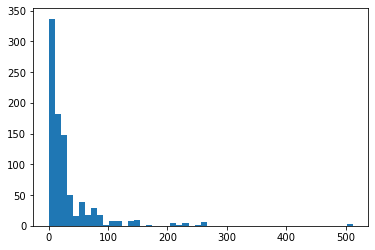

In [19]:
# What column to plot, and how many bins to draw.
# X is the fare (price), and Y is the frequency (how many paid this price)
plt.hist(df.Fare, bins=50)
plt.xlabel=("Fare")
plt.ylabel=("Frequency")

In [5]:
sum(df.Fare>200)

20

In [21]:
# For visual operations
import seaborn as sns

<AxesSubplot:xlabel='Age'>

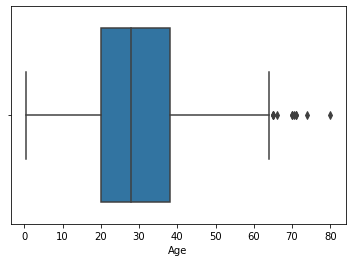

In [22]:
sns.boxplot(df.Age)

In [8]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
# Outliers
Q1 = np.percentile(df["Fare"], 25)
Q3 = np.percentile(df["Fare"], 75)
IQR = Q3 - Q1

In [25]:
Fare_outlier_rows = df[(df["Fare"] < Q1 - 1.5*IQR) | (df["Fare"] > Q3 + 1.5*IQR )].index
Fare_outlier_rows

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [11]:
len(Fare_outlier_rows)

116

In [26]:
mycols = ["Age","Fare"]
all_outlier_rows = []
for col in mycols:        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        col_outlier = df[(df[col] < Q1 - IQR_range) | 
                              (df[col] > Q3 + IQR_range )].index
        all_outlier_rows.extend(col_outlier)
   
    

In [28]:
len(all_outlier_rows)
all_outlier_rows

[1,
 27,
 31,
 34,
 52,
 61,
 62,
 72,
 88,
 102,
 118,
 120,
 124,
 139,
 151,
 159,
 180,
 195,
 201,
 215,
 218,
 224,
 230,
 245,
 256,
 257,
 258,
 262,
 268,
 269,
 275,
 290,
 291,
 297,
 299,
 305,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 336,
 337,
 341,
 366,
 369,
 373,
 375,
 377,
 380,
 385,
 390,
 393,
 412,
 435,
 438,
 445,
 453,
 484,
 486,
 496,
 498,
 504,
 505,
 520,
 527,
 537,
 540,
 544,
 550,
 557,
 558,
 581,
 585,
 587,
 591,
 609,
 627,
 641,
 645,
 655,
 659,
 660,
 665,
 679,
 681,
 689,
 698,
 700,
 708,
 716,
 730,
 737,
 741,
 742,
 745,
 759,
 763,
 765,
 779,
 789,
 792,
 802,
 820,
 829,
 835,
 846,
 849,
 856,
 863,
 879]

In [14]:
len(set(all_outlier_rows))

116

In [29]:
# (xi - x') / s.    This is how we normalize our data
z_score = (df["Fare"] - df["Fare"].mean()) / df["Fare"].std()

In [30]:
outliers = abs(z_score) > 3
sum(outliers)

20

In [31]:
min(df.Fare[outliers])

211.3375

In [32]:
df.Fare[df.Fare>200] = np.nan

In [33]:
df["Fare"].describe()

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: Fare, dtype: float64

In [34]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

In [35]:
Q1 = np.percentile(df["Fare"], 25)
Q3 = np.percentile(df["Fare"], 75)
IQR = Q3 - Q1

In [22]:
df.Fare[(df["Fare"] < Q1 - 1.5*IQR) | (df["Fare"] > Q3 + 1.5*IQR )] = np.nan

In [23]:
df.Fare.count()

775

In [24]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

In [25]:
z_score = (df["Fare"] - df["Fare"].mean()) / df["Fare"].std()
outliers = abs(z_score) > 3
sum(outliers)

20

In [26]:
df.Fare[outliers] = np.nan

# Exercise 2

1. plot an histogram for the **age** column with 10 bins
2. Create a **boxplot** for the **Fare** column. How many outliers?
3. Calculate the Interquartile range for the **Age** column
4. Print how many outliers exists for the **Age** column using **zcore > 2.5** 

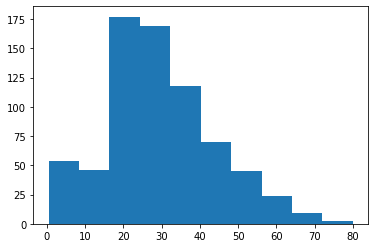

In [39]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

# 1
plt.hist(df.Age, bins=10)
plt.xlabel=("Age")
plt.ylabel=("Frequency")

<AxesSubplot:xlabel='Age'>

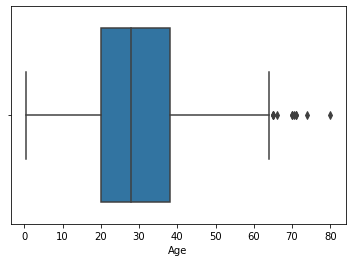

In [38]:
# 2
sns.boxplot(df.Fare)

In [42]:
df = df.dropna()
Q1 = np.percentile(df["Age"], 25)
Q3 = np.percentile(df["Age"], 75)
IQR = Q3 - Q1
print(IQR)

z_score = (df["Age"] - df["Age"].mean()) / df["Age"].std()
outliers = abs(z_score) > 2.5
sum(outliers)

23.5


1

# Duplications



In [43]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

In [44]:
df2 = pd.read_csv('data/titanic_small.csv', header=0, sep=',') 

In [45]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Heikkinen, Miss. Laina",male,22,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,0,3,"Heikkinen, Miss. Laina",male,22,1,0,A/5 21171,7.250,NaN,S
4,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,712.833,C85,C
5,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S


In [46]:
# Tells what rows are duplicated
df2.duplicated()

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [6]:
df2.duplicated().sum()

3

In [7]:
df2[df2.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,1,0,3,"Heikkinen, Miss. Laina",male,22,1,0,A/5 21171,7.250,NaN,S
4,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,712.833,C85,C
5,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S


In [8]:
# Get only duplicated rows where the name is duplicated
df[df.duplicated(['Name'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
df[df.duplicated(['Name'])].shape

(0, 12)

In [10]:
df2[df2.duplicated(['Name'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,0,3,"Heikkinen, Miss. Laina",male,22,1,0,A/5 21171,7.250,NaN,S
4,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,712.833,C85,C
5,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S


In [11]:
# How many duplicated values there are in Embarked column
df.Embarked.duplicated().sum()

887

In [12]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
df2.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Heikkinen, Miss. Laina",male,22,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S


In [14]:
df2 = pd.read_csv('data/titanic_small.csv', header=0, sep=',') 

In [15]:
# Keep only the first unique rows, based on Sex column.
df2.drop_duplicates(subset=['Sex'])
# We can also use keep='last' if we want to save the last copy of each duplication group 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Heikkinen, Miss. Laina",male,22,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,712.833,C85,C


# Exercise 3

1. Print how many duplicates for the *Age* clumn in **df**
2. Print the unique values of the **Sex** column 
3. drop duplicates of df2 according to the **Embarked** column 

In [ ]:
df.Age.duplicated().sum()

In [ ]:
df.Sex.unique().shape[0]